# **Airlines Delay Predictions [DSA Project]**

For this analysis, I will be using several different types of supervised machine learning methods in an attempt to make the most accurate prediction for whether there is a flight delay. This is a classification problem where the dependant varaible (Delay) has two states, 0 or 1, where 0 means there was no delay and 1 means there was a delay. This data provides only generic and static flight info. Information that can vary up until flight time, like weather, are not included in this data becauase that kind of information is generally unkown until flight time.

### Importing Libraries

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import keras

### Preparing data

In [3]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

dataset_path = '/content/gdrive/MyDrive/Colab Notebooks/airlines-dataset-to-predict-a-delay/Airlines.csv'

Mounted at /content/gdrive


In [4]:
df=pd.read_csv(dataset_path)
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [5]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [6]:
#drop id column
df.drop(columns=['id'],inplace=True)
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


In [7]:
#converting the labels into a numeric form using label encoder
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in columns 'Airline','AirportFrom', 'AirportTo'.
df['Airline']= label_encoder.fit_transform(df['Airline'])
df['AirportFrom']= label_encoder.fit_transform(df['AirportFrom'])
df['AirportTo']= label_encoder.fit_transform(df['AirportTo'])

### Visualizing the Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


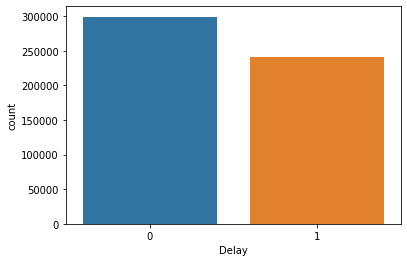

In [8]:
sns.countplot(df['Delay'])

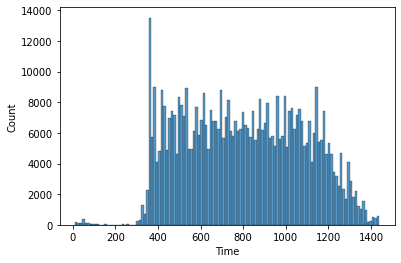

In [9]:
sns.histplot(df['Time'])

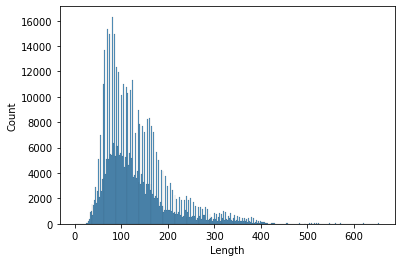

In [10]:
sns.histplot(df['Length'])

In [11]:
df['Length_by_hours'] = df['Length'] / 60
df['Time_by_hour'] = df['Time'] / 60

In [12]:
df.drop(columns=['Length', 'Time'], inplace=True)

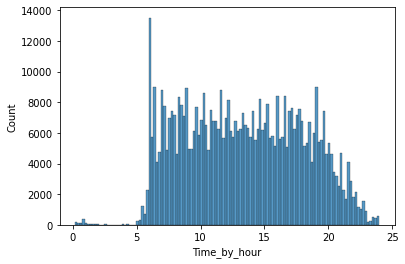

In [13]:
sns.histplot(df['Time_by_hour'])

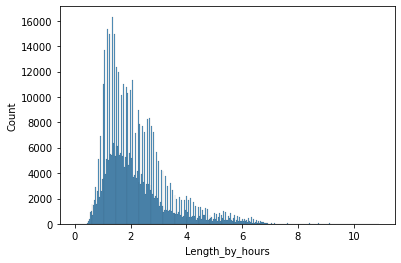

In [14]:
sns.histplot(df['Length_by_hours'])

### Corelation Among Features

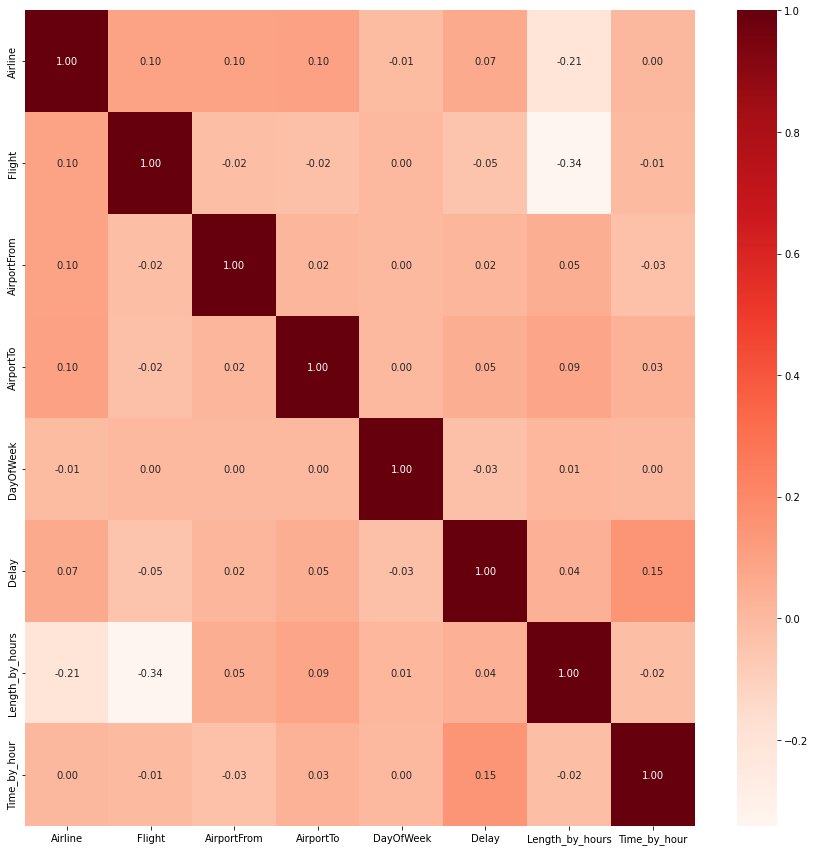

In [15]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [16]:
X = df.drop(columns='Delay')
y = df['Delay']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True)

### 1- Decision Tree Classifier Model
Here, the decision tree prediction will be evaluated.

In [18]:
#Fitting Decision Tree classifier to the training set
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=16,random_state=40) 
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=40)

In [19]:
print('DecisionTreeClassifierModel Train Score is : ' , classifier.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , classifier.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.6992114435444665
DecisionTreeClassifierModel Test Score is :  0.6464710135523462


In [21]:
#Predicting the test set result  
y_pred= classifier.predict(X_test) 

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6464710135523462


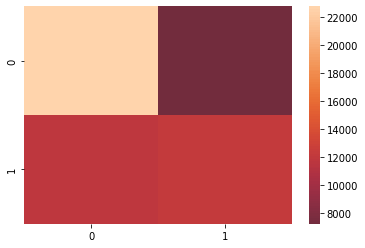

Confusion Matrix is
 [[22766  7247]
 [11822 12104]]


In [23]:
cm= confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, center=True)
plt.show()

print('Confusion Matrix is\n', cm)

### 2- Random Forest Classifier Model
The random forest utilies a technique called bagging that puts together an ensemble of decision trees and takes the average prediction of all of them. The decision trees in the random forest will use at most  2/3  (hyper-parameter) of the data in their construction. This amzingly ensures that as the number of trees in the random forest increases, the loss decreases, as seen in a plot below.

In [24]:
#Fitting Random Forest classifier to the training set
rfmodel = RandomForestClassifier(criterion = 'entropy', max_depth=18, n_estimators=400, random_state=44)
rfmodel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=18, n_estimators=400,
                       random_state=44)

In [25]:
print('RandomForestClassifierModel Train Score is : ' , rfmodel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , rfmodel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.7536914659569384
RandomForestClassifierModel Test Score is :  0.6614138193144107


In [26]:
#Predicting the test set result  
y_pred_RF= rfmodel.predict(X_test) 

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))

Accuracy: 0.6614138193144107


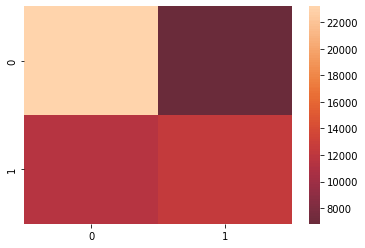

Confusion Matrix is
 [[23199  6814]
 [11449 12477]]


In [28]:
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)


### 3- Logistic Regression
Here I am using logistic regression to predict delays. The two most popular machine learning models are linear regression and logistic regression. In our case, because the dependant variable is categorical, logisitc regression will be used. Linear regression is used for continuous dependant variables.

In [30]:
df.nunique()

Airline              18
Flight             6585
AirportFrom         293
AirportTo           293
DayOfWeek             7
Delay                 2
Length_by_hours     426
Time_by_hour       1131
dtype: int64

above you can see the number of unique values for each feature. In order to perform standard linear regression, we must one-hot encode the categorical variables. As you can see above, the number of unique items in each category can be large, especially in the "Flight" category. To accomodate for this, the category is either left as is, or removed from the data frame entirely, because the machine would endure memory overload if this category was one-hot encoded. For this problem, it makes more sense to remove it entirely than to leave it as is due to the fact that there is no predictive value in the ordering of the ambiguous ID assignment.

In [31]:
lrmodel=LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [32]:
y_pred_LR= lrmodel.predict(X_test) 

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_LR))

Accuracy: 0.572164852889375


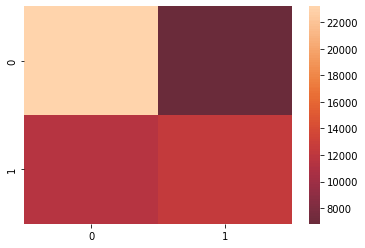

Confusion Matrix is
 [[23199  6814]
 [11449 12477]]


In [34]:
CM_LR = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_LR, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)


### Conclusion
Predicting whether a flight will incur a delay is difficult. Most of the time, a delay will occur for seemingly random reasons, like weather. In this data set, the only information given about the flight is that which is created when the flight itself is made. Things weather and status of prior flights are not included in this data, but certainly are big components in influencing flight delays. This creates an upper bound of predictive power we can achieve with this data that cannot be crossed because of this lack of crucial information.